# Intro to Data Science @ SzISz Part VII.
## Grand Finale:<br> Model Selection, Pipeline building, and Custom Sklearn Nodes 

### Table of contents
- <a href="#What-is-Model-Selection?">Model Selection Theory</a>
- <a href="#Cross-Validation">Cross Validation</a>
    - <a href="#Grid-Search-Cross-Validation">Randomized Search Cross Validation</a>
    - <a href="#Randomized-Search-Cross-Validation">Randomized Search Cross Validation</a>
- <a href="#Building-Pipelines">Building Pipelines</a>
- <a href="#Building-a-Custom-Sklearn-Node">Building a Custom Scikit-learn Node</a>
    

## What is Model Selection?
_"Model selection is the task of selecting a statistical model from a set of candidate models, given data. In the simplest cases, a pre-existing set of data is considered."_ from: <a href="https://en.wikipedia.org/wiki/Model_selection">Wiki</a>  
In this context we also include the process of finding the optimal hyperparameters.

## Why is it important?
To find the optimal solution to a given problem, one must train several models with similar predictive/exploratory power and select the simplest one. This process includes selecting models and finding optimal hyperparameters which is a time consuming and tedious work when done by hand. We use automatized solutions to overcome this problem, save time, and yield better results.

## Tools
- Grid Search
- Randomized search
- etc.

In [2]:
%matplotlib inline
import numpy as np
import scipy.sparse as sp
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_digits, fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import RandomizedPCA, TruncatedSVD
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.svm import SVC

np.random.seed = 42

In [3]:
digits = load_digits()
X_dig, y_dig = digits.data, digits.target

In [4]:
categories = [
    'alt.atheism',
    'talk.religion.misc',
]
twentynews = fetch_20newsgroups(subset='train', categories=categories)
X_20, y_20 = twentynews.data, twentynews.target

## <a href="http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation">Cross Validation</a>

In order to select an optimal model, first one must be able to measure a model's/pipe's accuracy.  

First, one must select a valid metric for the model. In sklearn, the basic validation metric is accuracy score in case of classification, and $r^{2}$ for regression. Altough, several other metrics can be selected from <a href="http://scikit-learn.org/stable/modules/model_evaluation.html#the-scoring-parameter-defining-model-evaluation-rules">this</a> list.

_"Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data. This situation is called overfitting."_ [1]. To overcome this problem, one must split the data to __training__ and __test__ dataset; train the model on the train dataset, then measure the precision on the test dataset.

However different splits can produce different outcomes, so this process must be repeated several times to give a good approximation to the examined model's accuracy. This process is called __Cross Validation__ and there are <a href="http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation-iterators">different strategies</a> to make these splits.

A simple model can yield different solutions to the same data based on its hyperparameters so multiple models must be trained to select the ideal hyperparamter settings. Cross Validation gives a good approximation to a trained model's accuracy, but additional methods are required to select the ideal hyperparameters. 

[1] <a href="http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation-evaluating-estimator-performance">Scikit-learn 0.17.1 documentation</a>


### Grid Search Cross Validation
Grid search is a method which generates a parameter grid from a list of settings, and measure the input model's accuracy in every setting using cross validation.

In [7]:
from sklearn.grid_search import GridSearchCV

---
## Intermission:
## Building Pipelines
A Quick reminder how to build sklearn pipes and how to access their parameters.

In [5]:
from sklearn.pipeline import Pipeline, FeatureUnion

In [6]:
steps = [
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier())
]
pipe_20 = Pipeline(steps=steps)

In [7]:
pipe_20.steps

[('vect',
  CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
          dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
          lowercase=True, max_df=1.0, max_features=None, min_df=1,
          ngram_range=(1, 1), preprocessor=None, stop_words=None,
          strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
          tokenizer=None, vocabulary=None)),
 ('tfidf', TfidfTransformer(norm=u'l2', smooth_idf=True, sublinear_tf=False,
           use_idf=True)),
 ('clf',
  SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
         eta0=0.0, fit_intercept=True, l1_ratio=0.15,
         learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
         penalty='l2', power_t=0.5, random_state=None, shuffle=True,
         verbose=0, warm_start=False))]

In [8]:
pipe_20.get_params()

{'clf': SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
        eta0=0.0, fit_intercept=True, l1_ratio=0.15,
        learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
        penalty='l2', power_t=0.5, random_state=None, shuffle=True,
        verbose=0, warm_start=False),
 'clf__alpha': 0.0001,
 'clf__average': False,
 'clf__class_weight': None,
 'clf__epsilon': 0.1,
 'clf__eta0': 0.0,
 'clf__fit_intercept': True,
 'clf__l1_ratio': 0.15,
 'clf__learning_rate': 'optimal',
 'clf__loss': 'hinge',
 'clf__n_iter': 5,
 'clf__n_jobs': 1,
 'clf__penalty': 'l2',
 'clf__power_t': 0.5,
 'clf__random_state': None,
 'clf__shuffle': True,
 'clf__verbose': 0,
 'clf__warm_start': False,
 'steps': [('vect',
   CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
           dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
           lowercase=True, max_df=1.0, max_features=None, min_df=1,
           ngram_range=(1, 1), preprocessor=N

In [9]:
pipe_20.set_params(tfidf__norm='l1')

Pipeline(steps=[('vect', CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        st...   penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False))])

In [10]:
pipe_20.get_params()

{'clf': SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
        eta0=0.0, fit_intercept=True, l1_ratio=0.15,
        learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
        penalty='l2', power_t=0.5, random_state=None, shuffle=True,
        verbose=0, warm_start=False),
 'clf__alpha': 0.0001,
 'clf__average': False,
 'clf__class_weight': None,
 'clf__epsilon': 0.1,
 'clf__eta0': 0.0,
 'clf__fit_intercept': True,
 'clf__l1_ratio': 0.15,
 'clf__learning_rate': 'optimal',
 'clf__loss': 'hinge',
 'clf__n_iter': 5,
 'clf__n_jobs': 1,
 'clf__penalty': 'l2',
 'clf__power_t': 0.5,
 'clf__random_state': None,
 'clf__shuffle': True,
 'clf__verbose': 0,
 'clf__warm_start': False,
 'steps': [('vect',
   CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
           dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
           lowercase=True, max_df=1.0, max_features=None, min_df=1,
           ngram_range=(1, 1), preprocessor=N

__end of intermission__

---

In [11]:
pipe_digit = Pipeline(steps=[('pca', RandomizedPCA()), ('logistic', LogisticRegression())])

In [12]:
param_grid = [
    {'pca__n_components': [20, 40, 64], 'logistic__C': np.logspace(-4, 4, 3)},
]

In [13]:
grid_search = GridSearchCV(estimator=pipe_digit, param_grid=param_grid, verbose=1)
grid_search

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(steps=[('pca', RandomizedPCA(copy=True, iterated_power=3, n_components=None,
       random_state=None, whiten=False)), ('logistic', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'logistic__C': array([  1.00000e-04,   1.00000e+00,   1.00000e+04]), 'pca__n_components': [20, 40, 64]}],
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [14]:
grid_search.fit(X_dig, y_dig)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    8.3s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(steps=[('pca', RandomizedPCA(copy=True, iterated_power=3, n_components=None,
       random_state=None, whiten=False)), ('logistic', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'logistic__C': array([  1.00000e-04,   1.00000e+00,   1.00000e+04]), 'pca__n_components': [20, 40, 64]}],
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [15]:
grid_search.best_estimator_.get_params(deep=False)

{'steps': [('pca',
   RandomizedPCA(copy=True, iterated_power=3, n_components=40, random_state=None,
          whiten=False)),
  ('logistic',
   LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
             intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
             penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
             verbose=0, warm_start=False))]}

In [16]:
grid_search.best_params_, grid_search.best_score_

({'logistic__C': 1.0, 'pca__n_components': 40}, 0.92264885920979411)

In [64]:
hmap = pd.DataFrame([{
            'mean': mean,
            'C': param['logistic__C'],
            'n': param['pca__n_components']
        } for param, mean, _ in grid_search.grid_scores_])

In [65]:
hmap

,C,mean,n
0,0.0001,0.875348,20
1,0.0001,0.887590,40
2,0.0001,0.887034,64
3,1.0000,0.917641,20
4,1.0000,0.922649,40
5,1.0000,0.917641,64
6,10000.0000,0.907624,20
7,10000.0000,0.901503,40
8,10000.0000,0.895381,64


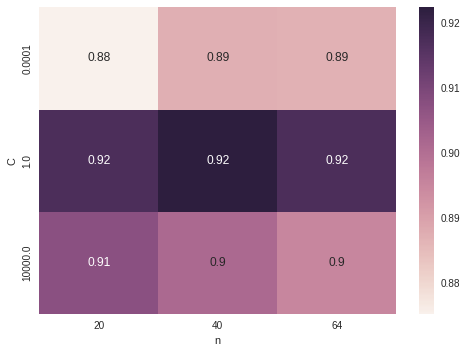

In [63]:
sns.heatmap(hmap.pivot(index='C', columns='n', values='mean'), annot=True)

### Randomized Search Cross Validation
Randomized search randomly generate a fixed number of hyperparameter setups. It selects the parameters from the provided parameter parameter ranges and then measures them with cross validation.

In [17]:
from sklearn.grid_search import RandomizedSearchCV

In [18]:
param_dist = {
    'vect__max_df': (0.5, 0.75, 1.0),
    'vect__max_features': (None, 5000, 10000, 50000),
    'vect__ngram_range': ((1, 1), (1, 2)),  # unigrams or bigrams
    'tfidf__use_idf': (True, False),
    'tfidf__norm': ('l1', 'l2'),
    'clf__alpha': (0.00001, 0.000001),
    'clf__penalty': ('l2', 'elasticnet'),
    'clf__n_iter': (10, 50, 80),
}
n_iter_search = 30

In [20]:
random_search = RandomizedSearchCV(
    estimator=pipe_20,
    param_distributions=param_dist,
    verbose=2,
    random_state=42
)
random_search

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=Pipeline(steps=[('vect', CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        st...   penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False))]),
          fit_params={}, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'vect__ngram_range': ((1, 1), (1, 2)), 'tfidf__use_idf': (True, False), 'tfidf__norm': ('l1', 'l2'), 'vect__max_df': (0.5, 0.75, 1.0), 'clf__penalty': ('l2', 'elasticnet'), 'clf__n_iter': (10, 50, 80), 'vect__max_features': (None, 5000, 10000, 50000), 'clf__alpha': (1e-05, 1e-06)},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          scoring=None, verbose=2)

In [21]:
random_search.fit(X_20, y_20)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] vect__ngram_range=(1, 1), vect__max_df=1.0, clf__n_iter=80, tfidf__use_idf=True, tfidf__norm=l2, clf__penalty=elasticnet, vect__max_features=50000, clf__alpha=1e-06 
[CV]  vect__ngram_range=(1, 1), vect__max_df=1.0, clf__n_iter=80, tfidf__use_idf=True, tfidf__norm=l2, clf__penalty=elasticnet, vect__max_features=50000, clf__alpha=1e-06 -   0.4s
[CV] vect__ngram_range=(1, 1), vect__max_df=1.0, clf__n_iter=80, tfidf__use_idf=True, tfidf__norm=l2, clf__penalty=elasticnet, vect__max_features=50000, clf__alpha=1e-06 
[CV]  vect__ngram_range=(1, 1), vect__max_df=1.0, clf__n_iter=80, tfidf__use_idf=True, tfidf__norm=l2, clf__penalty=elasticnet, vect__max_features=50000, clf__alpha=1e-06 -   0.4s
[CV] vect__ngram_range=(1, 1), vect__max_df=1.0, clf__n_iter=80, tfidf__use_idf=True, tfidf__norm=l2, clf__penalty=elasticnet, vect__max_features=50000, clf__alpha=1e-06 
[CV]  vect__ngram_range=(1, 1), vect__max_df=1.0, clf__n_iter=80, 

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   22.6s finished


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=Pipeline(steps=[('vect', CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        st...   penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False))]),
          fit_params={}, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'vect__ngram_range': ((1, 1), (1, 2)), 'tfidf__use_idf': (True, False), 'tfidf__norm': ('l1', 'l2'), 'vect__max_df': (0.5, 0.75, 1.0), 'clf__penalty': ('l2', 'elasticnet'), 'clf__n_iter': (10, 50, 80), 'vect__max_features': (None, 5000, 10000, 50000), 'clf__alpha': (1e-05, 1e-06)},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          scoring=None, verbose=2)

In [22]:
random_search.best_estimator_.get_params(deep=False)

{'steps': [('vect',
   CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
           dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
           lowercase=True, max_df=0.75, max_features=50000, min_df=1,
           ngram_range=(1, 2), preprocessor=None, stop_words=None,
           strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
           tokenizer=None, vocabulary=None)),
  ('tfidf', TfidfTransformer(norm='l1', smooth_idf=True, sublinear_tf=False,
            use_idf=False)),
  ('clf',
   SGDClassifier(alpha=1e-06, average=False, class_weight=None, epsilon=0.1,
          eta0=0.0, fit_intercept=True, l1_ratio=0.15,
          learning_rate='optimal', loss='hinge', n_iter=80, n_jobs=1,
          penalty='elasticnet', power_t=0.5, random_state=None, shuffle=True,
          verbose=0, warm_start=False))]}

In [23]:
random_search.best_params_, random_search.best_score_

({'clf__alpha': 1e-06,
  'clf__n_iter': 80,
  'clf__penalty': 'elasticnet',
  'tfidf__norm': 'l1',
  'tfidf__use_idf': False,
  'vect__max_df': 0.75,
  'vect__max_features': 50000,
  'vect__ngram_range': (1, 2)},
 0.92998833138856474)

In [37]:
random_search.grid_scores_[0]

mean: 0.92882, std: 0.01089, params: {'vect__ngram_range': (1, 1), 'vect__max_df': 1.0, 'clf__n_iter': 80, 'tfidf__use_idf': True, 'tfidf__norm': 'l2', 'clf__penalty': 'elasticnet', 'vect__max_features': 50000, 'clf__alpha': 1e-06}

In [79]:
random_search_digit = RandomizedSearchCV(
    pipe_digit,
    {
        'pca__n_components': np.linspace(10, 100, 91),
        'logistic__C': np.logspace(-4, 4, 30),
    },
    n_iter=30)

In [ ]:
random_search_digit.fit(X_dig, y_dig)

In [81]:
hmap_r = pd.DataFrame([{
            'mean': mean,
            'C': param['logistic__C'],
            'n': param['pca__n_components']
        } for param, mean, _ in random_search_digit.grid_scores_])

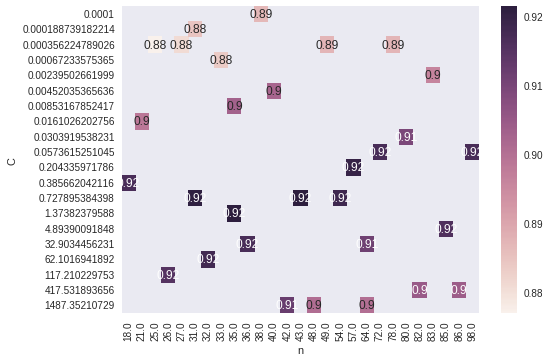

In [82]:
sns.heatmap(hmap_r.pivot(index='C', columns='n', values='mean'), annot=True)

## Building a Custom Sklearn Node

In [6]:
from sklearn.base import BaseEstimator, TransformerMixin, ClassifierMixin, ClusterMixin

In [2]:
class OptimusPrime(BaseEstimator, TransformerMixin):
    def __init__(self, divisor):
        self.divisor = np.float(divisor)
        
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return np.round([x/self.divisor for x in X])

In [9]:
optimus = OptimusPrime(3.5)
X = np.diag(np.linspace(1,100, 11)) 
optimus.fit_transform(X)

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   3.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   6.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   9.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,  12.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,  14.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,  17.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,  20.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  23.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  26.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  29.]])

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
def foo(*args, **kwargs):
    print args, kwargs

foo(1, 2, 'a', 'b')
foo(a=1, b=8, c=9)
foo(1, 2, a="a")

(1, 2, 'a', 'b') {}
() {'a': 1, 'c': 9, 'b': 8}
(1, 2) {'a': 'a'}


In [13]:
class MyClassifier(BaseEstimator, ClassifierMixin):
    
    def __init__(self, mode='knn', n_neighbors=5, n_iter=5, alpha=0.0001):
        self.mode = mode
        self.n_neighbors = n_neighbors
        self.n_iter = n_iter
        self.alpha = alpha        
        self.estimator = None
            
    def _init_estimator(self):
        if self.mode == 'knn':
            return KNeighborsClassifier(n_neighbors=self.n_neighbors)
        elif self.mode == 'sgd':
            return SGDClassifier(n_iter=self.n_iter, alpha=self.alpha)
        else:
            raise NotImplementedError('Only knn and sgd mode supported.')
    
    def fit(self, X, y=None):
        if not self.estimator:
            self.estimator = self._init_estimator()
        self.estimator = self.estimator.fit(X, y)
        return self
    
    def predict(self, X, y=None):
        return self.estimator.predict(X)
    
    def fit_predict(self, X, y=None):
        return self.estimator.fit(X, y).predict(X)

In [14]:
pipe_20_comma = Pipeline([
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('clf', MyClassifier())
    ])

In [17]:
comma_params = [
    {'clf__mode': ['knn', 'sgd']},
    {'clf__mode': ['knn'], 'clf__n_neighbors': [3, 7, 10]},
    {'clf__mode': ['sgd'],'clf__alpha': (0.00001, 0.000001), 'clf__n_iter': (10, 50, 80)}
]
grid_comma = GridSearchCV(pipe_20_comma, comma_params, verbose=2)

In [18]:
grid_comma.fit(X_20, y_20)

Fitting 3 folds for each of 11 candidates, totalling 33 fits
[CV] clf__mode=knn ...................................................
[CV] .......................................... clf__mode=knn -   0.4s
[CV] clf__mode=knn ...................................................
[CV] .......................................... clf__mode=knn -   0.3s
[CV] clf__mode=knn ...................................................
[CV] .......................................... clf__mode=knn -   0.3s
[CV] clf__mode=sgd ...................................................
[CV] .......................................... clf__mode=sgd -   0.3s
[CV] clf__mode=sgd ...................................................
[CV] .......................................... clf__mode=sgd -   0.3s
[CV] clf__mode=sgd ...................................................
[CV] .......................................... clf__mode=sgd -   0.3s
[CV] clf__mode=knn, clf__n_neighbors=3 ...............................
[CV] ...........

[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:   11.3s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(steps=[('vect', CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        st...,
         use_idf=True)), ('clf', MyClassifier(alpha=0.0001, mode='knn', n_iter=5, n_neighbors=5))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'clf__mode': ['knn', 'sgd']}, {'clf__mode': ['knn'], 'clf__n_neighbors': [3, 7, 10]}, {'clf__n_iter': (10, 50, 80), 'clf__mode': ['sgd'], 'clf__alpha': (1e-05, 1e-06)}],
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=2)

In [19]:
grid_comma.best_params_

{'clf__alpha': 1e-06, 'clf__mode': 'sgd', 'clf__n_iter': 50}

#### Hyperparameter search
- <a href="https://github.com/rhiever/tpot">TPOT</a>
- <a href="https://medium.com/rants-on-machine-learning/smarter-parameter-sweeps-or-why-grid-search-is-plain-stupid-c17d97a0e881#.aify5h22n">Other hyperparameter searching methods</a> 